In [1]:
!pip install datasets
!pip install transformers

     |████████████████████████████████| 298 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 51.3 MB/s 
     |████████████████████████████████| 61 kB 428 kB/s 
     |████████████████████████████████| 132 kB 54.0 MB/s 
     |████████████████████████████████| 243 kB 69.7 MB/s 
     |████████████████████████████████| 160 kB 65.3 MB/s 
     |████████████████████████████████| 271 kB 71.9 MB/s 
     |████████████████████████████████| 192 kB 77.0 MB/s 
     |████████████████████████████████| 3.1 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 57.0 MB/s 
     |████████████████████████████████| 3.3 MB 46.2 MB/s 
     |████████████████████████████████| 596 kB 74.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from datasets import load_dataset
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import initializers
import transformers
transformers.logging.set_verbosity_error()
import math
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
import json

In [3]:
def get_data(dataset_name):
  if dataset_name == 'sst':
    dataset = load_dataset('sst', 'default')
    x_train = dataset['train']['sentence']
    y_train = dataset['train']['label']
    x_val = dataset['validation']['sentence']
    y_val = dataset['validation']['label']
    x_train_full = x_train + x_val
    y_train_full = y_train + y_val
    x_test = dataset['train']['sentence']
    y_test = dataset['train']['label']
  elif dataset_name == 'imdb':
    # TODO
    pass
  return x_train, y_train, x_val, y_val, x_train_full, y_train_full, x_test, y_test

In [4]:
dataset_name = 'sst'

x_train, y_train, x_val, y_val, x_train_full, y_train_full, x_test, y_test = get_data(dataset_name)
print(f'x_train length: {len(x_train)}')
print(f'y_train length: {len(y_train)}')
print(f'x_val length: {len(x_val)}')
print(f'y_val length: {len(y_val)}')
print(f'x_train_full length: {len(x_train_full)}')
print(f'y_train_full length: {len(y_train_full)}')
print(f'x_test length: {len(x_test)}')
print(f'y_test length: {len(y_test)}')

Downloading:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.37M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/790k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset sst downloaded and prepared to /root/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

x_train length: 8544
y_train length: 8544
x_val length: 1101
y_val length: 1101
x_train_full length: 9645
y_train_full length: 9645
x_test length: 8544
y_test length: 8544


In [5]:
max_tokens = 20000
max_length = 100

text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=max_length
)
text_vectorization.adapt(x_train)

In [6]:
vocabulary = text_vectorization.get_vocabulary()
test_sentence = 'I write, rewrite, and still rewrite again'
encoded_sentence = text_vectorization(test_sentence)
print(f'encoded_sentence:\n{encoded_sentence}')

encoded_sentence:
[   39  8273 10441     4   124 10441   243     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [7]:
x_train = text_vectorization(tf.expand_dims(x_train, -1))
y_train = np.array(y_train)
y_train = np.round(y_train)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_val = text_vectorization(tf.expand_dims(x_val, -1))
y_val = np.array(y_val)
y_val = np.round(y_val)
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')

x_train_full = text_vectorization(tf.expand_dims(x_train_full, -1))
y_train_full = np.array(y_train_full)
y_train_full = np.round(y_train_full)
print(f'x_train_full shape: {x_train_full.shape}')
print(f'y_train_full shape: {y_train_full.shape}')

x_test = text_vectorization(tf.expand_dims(x_test, -1))
y_test = np.array(y_test)
y_test = np.round(y_test)
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (8544, 100)
y_train shape: (8544,)
x_val shape: (1101, 100)
y_val shape: (1101,)
x_train_full shape: (9645, 100)
y_train_full shape: (9645,)
x_test shape: (8544, 100)
y_test shape: (8544,)


In [8]:
word_index = dict(zip(vocabulary, range(len(vocabulary))))

In [9]:
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

num_tokens = len(vocabulary) + 2
embedding_dim = 512
embedding_matrix = np.zeros((num_tokens, embedding_dim))
hits = 0
misses = 0

for word, i in word_index.items():
  embedding_vector = embed([word])
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
    hits += 1
  else:
    misses += 1

print(f'Converted {hits} words ({misses} misses)')

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloading https://tfhub.dev/google/universal-sentence-encoder/4: 810.00MB
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.


Converted 16453 words (0 misses)


In [10]:
class PositionalEmbedding(layers.Layer):
  def __init__(self, scheme, max_length, embedding_dim, use_minmax_scale, trainable, **kwargs):
    super().__init__(**kwargs)
    if scheme == 'learned':
      embedding_matrix = np.random.uniform(low=-0.05, high=0.05, size=(max_length, embedding_dim))
    elif scheme == 'sinusoidal':
      pos = np.arange(max_length)[:, np.newaxis]
      i = np.arange(embedding_dim)[np.newaxis, :]
      angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(embedding_dim))
      embedding_matrix = pos * angle_rates
      embedding_matrix[:, 0::2] = np.sin(embedding_matrix[:, 0::2])
      embedding_matrix[:, 1::2] = np.cos(embedding_matrix[:, 1::2])
    elif scheme == 'word_index':
      embedding_matrix = np.arange(max_length, dtype=float)
      embedding_matrix = embedding_matrix[..., np.newaxis]
      embedding_matrix = np.repeat(embedding_matrix, embedding_dim, axis=1)
    elif scheme == 'fract_seq_len':
      embedding_matrix = np.linspace(0, 1, max_length)
      embedding_matrix = embedding_matrix[..., np.newaxis]
      embedding_matrix = np.repeat(embedding_matrix, embedding_dim, axis=1)
    elif scheme == 'bert':
      model = transformers.BertModel.from_pretrained('bert-base-uncased')
      embedding_matrix = model.embeddings.position_embeddings.weight.data.numpy()
      embedding_matrix = PCA(embedding_dim).fit_transform(embedding_matrix)[:max_length]
    elif scheme == 'gpt2':
      model = transformers.GPT2Model.from_pretrained('gpt2')
      embedding_matrix = model.wpe.weight.data.numpy()
      embedding_matrix = PCA(embedding_dim).fit_transform(embedding_matrix)[:max_length]
    elif scheme == 'roberta':
      model = transformers.RobertaModel.from_pretrained('roberta-base')
      embedding_matrix = model.embeddings.position_embeddings.weight.data.numpy()
      embedding_matrix = PCA(embedding_dim).fit_transform(embedding_matrix)[:max_length]
    if use_minmax_scale:
      embedding_matrix = minmax_scale(embedding_matrix, feature_range=(min_val, max_val))
    embedding_matrix = tf.cast(embedding_matrix, dtype=tf.float32)
    self.positional_embeddings = layers.Embedding(
        input_dim=max_length,
        output_dim=embedding_dim,
        embeddings_initializer=initializers.Constant(embedding_matrix),
        trainable=trainable)

  def call(self, inputs):
    length = tf.shape(inputs)[-1]
    positions = tf.range(start=0, limit=length, delta=1)
    return self.positional_embeddings(positions)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 512)    8424960     ['input_1[0][0]']                
                                                                                                  
 positional_embedding (Position  (None, 512)         51200       ['input_1[0][0]']                
 alEmbedding)                                                                                     
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, None, 512)   0           ['embedding[0][0]',          

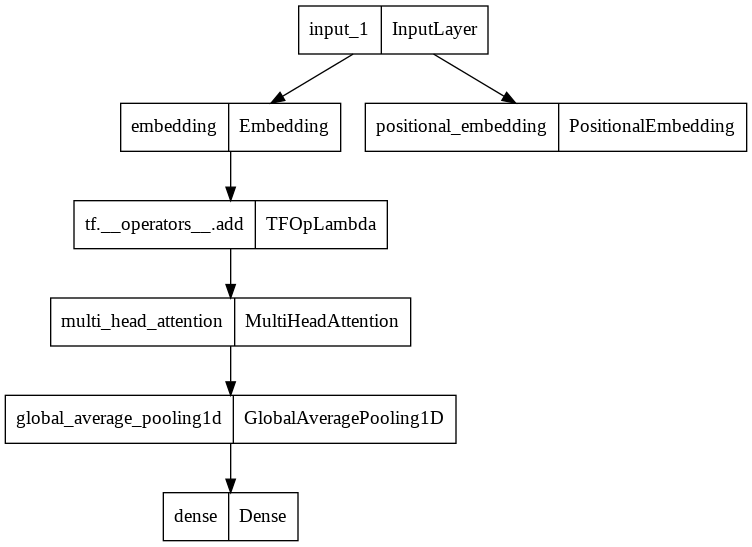

In [11]:
def build_model(scheme, use_minmax_scale, trainable, num_heads=1, key_dim=10):
  inputs = keras.Input(shape=(None,), dtype='int64')
  token_embeddings = layers.Embedding(
      input_dim=num_tokens,
      output_dim=embedding_dim,
      embeddings_initializer=initializers.Constant(embedding_matrix),
      trainable=False)(inputs)
  if scheme != 'baseline':
    positional_embeddings = PositionalEmbedding(
        scheme=scheme,
        max_length=max_length,
        embedding_dim=embedding_dim,
        use_minmax_scale=use_minmax_scale,
        trainable=trainable)(inputs)
    contextualized_embeddings = token_embeddings + positional_embeddings
    x = layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=key_dim)(contextualized_embeddings, contextualized_embeddings)
  else:
    x = layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=key_dim)(token_embeddings, token_embeddings)
  x = layers.GlobalAveragePooling1D()(x)
  outputs = layers.Dense(units=1, activation='sigmoid')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model


model = build_model('learned', use_minmax_scale=False, trainable=True)
model.summary()
keras.utils.plot_model(model)

In [12]:
def get_best_epoch(scheme, use_minmax_scale, trainable):
  model = build_model(scheme, use_minmax_scale, trainable)
  callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', mode='min', patience=10
    )
  ]
  history = model.fit(
      x_train, y_train,
      validation_data=(x_val, y_val),
      epochs=100,
      batch_size=128,
      callbacks=callbacks,
      verbose=0
  )
  val_loss_per_epoch = history.history['val_loss']
  best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
  return history, best_epoch

In [13]:
def get_best_trained_model(scheme=None, use_minmax_scale=False, trainable=False):
  train_val_history, best_epoch = get_best_epoch(scheme, use_minmax_scale, trainable)
  model = build_model(scheme, use_minmax_scale, trainable)
  model.fit(
      x_train_full,
      y_train_full,
      batch_size=128,
      epochs=int(best_epoch * 1.2),
      verbose=0
  )
  return train_val_history, best_epoch, model

In [14]:
schemes = [
  {
      'name': 'baseline',
      'use_minmax_scale': False,
      'trainable': False
  },
  {
      'name': 'learned',
      'use_minmax_scale': False,
      'trainable': True
  },
  {
      'name': 'sinusoidal',
      'use_minmax_scale': False,
      'trainable': False
  },
  {
      'name': 'word_index',
      'use_minmax_scale': False,
      'trainable': False
  },
  {
      'name': 'fract_seq_len',
      'use_minmax_scale': False,
      'trainable': False
  },
  {
      'name': 'bert',
      'use_minmax_scale': False,
      'trainable': False
  },
  {
      'name': 'gpt2',
      'use_minmax_scale': False,
      'trainable': False
  },
  {
      'name': 'roberta',
      'use_minmax_scale': False,
      'trainable': False
  }
]
results_dict = {}
positional_embeddings_dict = {}

for scheme in schemes:
  train_val_history, best_epoch, model = get_best_trained_model(scheme['name'], use_minmax_scale=scheme['use_minmax_scale'], trainable=scheme['trainable'])
  test_loss, test_accuracy = model.evaluate(
      x_test,
      y_test,
      verbose=0
  )
  results_dict[scheme['name']] = {
      'model': model,
      'best_epoch': best_epoch,
      'loss': train_val_history.history['loss'],
      'accuracy': train_val_history.history['accuracy'],
      'val_loss': train_val_history.history['val_loss'],
      'val_accuracy': train_val_history.history['val_accuracy'],
      'test_loss': test_loss,
      'test_accuracy': test_accuracy,
  }
  if scheme['name'] != 'baseline':
    positional_embeddings_dict[scheme['name']] = tf.identity(model.layers[2].weights[0])

test_results = [[k, v['test_loss'], v['test_accuracy']] for k, v in results_dict.items()]
for test_result in test_results:
  print(f'Scheme: {test_result[0]:<26} - Test loss: {test_result[1]:.6f} - Test accuracy: {test_result[2]:.6f}')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Scheme: baseline                   - Test loss: 0.456285 - Test accuracy: 0.779143
Scheme: learned                    - Test loss: 0.469237 - Test accuracy: 0.773174
Scheme: sinusoidal                 - Test loss: 0.693139 - Test accuracy: 0.503277
Scheme: word_index                 - Test loss: 0.683907 - Test accuracy: 0.564256
Scheme: fract_seq_len              - Test loss: 0.641831 - Test accuracy: 0.618446
Scheme: bert                       - Test loss: 0.453597 - Test accuracy: 0.783240
Scheme: gpt2                       - Test loss: 0.466915 - Test accuracy: 0.770950
Scheme: roberta                    - Test loss: 0.466076 - Test accuracy: 0.774930


In [15]:
def create_model_loss_plot(results_dict, filename):
  num_subplots = len(positional_embeddings_dict)
  num_cols = min(num_subplots, 3)
  num_rows = math.ceil(num_subplots / num_cols)
  plt.figure(figsize=(6*num_cols, 4.5*num_rows), dpi=80)
  for i, (scheme, results) in enumerate(results_dict.items()):
    plt.subplot(num_rows, num_cols, i+1)
    plt.plot(results['loss'], label='Train Loss')
    plt.plot(results['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(scheme)
  plt.tight_layout()
  plt.show()
  # plt.savefig(os.path.join('.', filename))

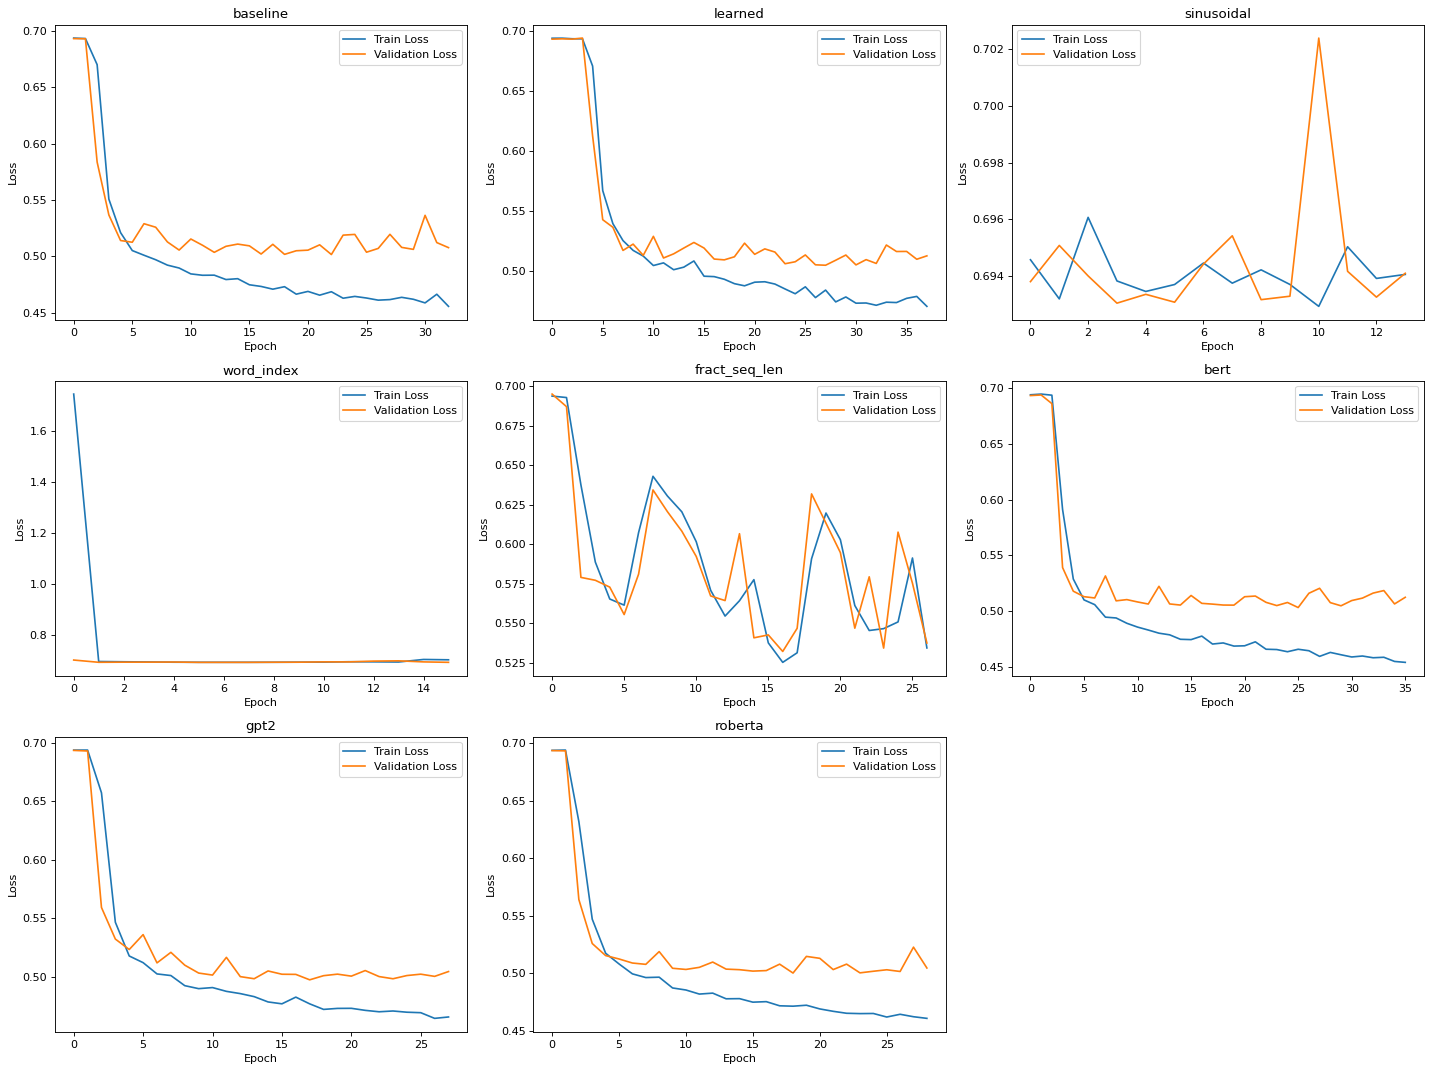

In [16]:
create_model_loss_plot(results_dict, f'model_loss_plot.png')

In [17]:
def create_model_accuracy_barplot(results_dict, filename):
  plt.figure(figsize=(6, 4.5), dpi=80)
  test_accuracies = [results['test_accuracy'] for results in results_dict.values()]
  plt.barh(range(len(test_accuracies)), test_accuracies)
  for i, test_accuracy in enumerate(test_accuracies):
    plt.text(test_accuracy, i - 0.1, f'{test_accuracy:.6f}')
  plt.xlim([0.4, 0.9])
  plt.yticks(range(len(test_accuracies)), list(results_dict.keys()))
  plt.xlabel('Test Accuracy')
  plt.ylabel('Scheme')
  plt.tight_layout()
  plt.show()
  # plt.savefig(os.path.join('.', filename))

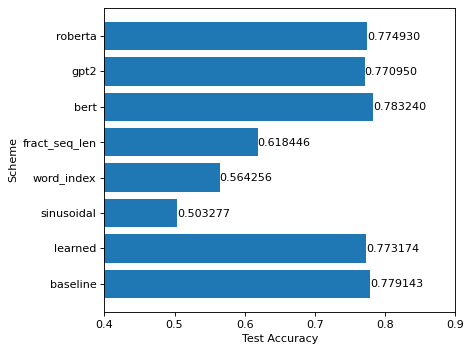

In [18]:
create_model_accuracy_barplot(results_dict, 'model_accuracy_barplot.png')

In [19]:
def create_positional_embeddings_colormesh(positional_embeddings_dict, filename):
  num_subplots = len(positional_embeddings_dict)
  num_cols = min(num_subplots, 3)
  num_rows = math.ceil(num_subplots / num_cols)
  plt.figure(figsize=(6*num_cols, 4.5*num_rows), dpi=80)
  for i, (scheme, positional_embeddings) in enumerate(positional_embeddings_dict.items()):
    plt.subplot(num_rows, num_cols, i+1)
    plt.pcolormesh(tf.transpose(positional_embeddings), cmap='RdBu')
    plt.ylabel('Depth')
    plt.xlabel('Position')
    plt.colorbar()
    plt.title(scheme)
  plt.tight_layout()
  plt.show()
  # plt.savefig(os.path.join('.', filename))

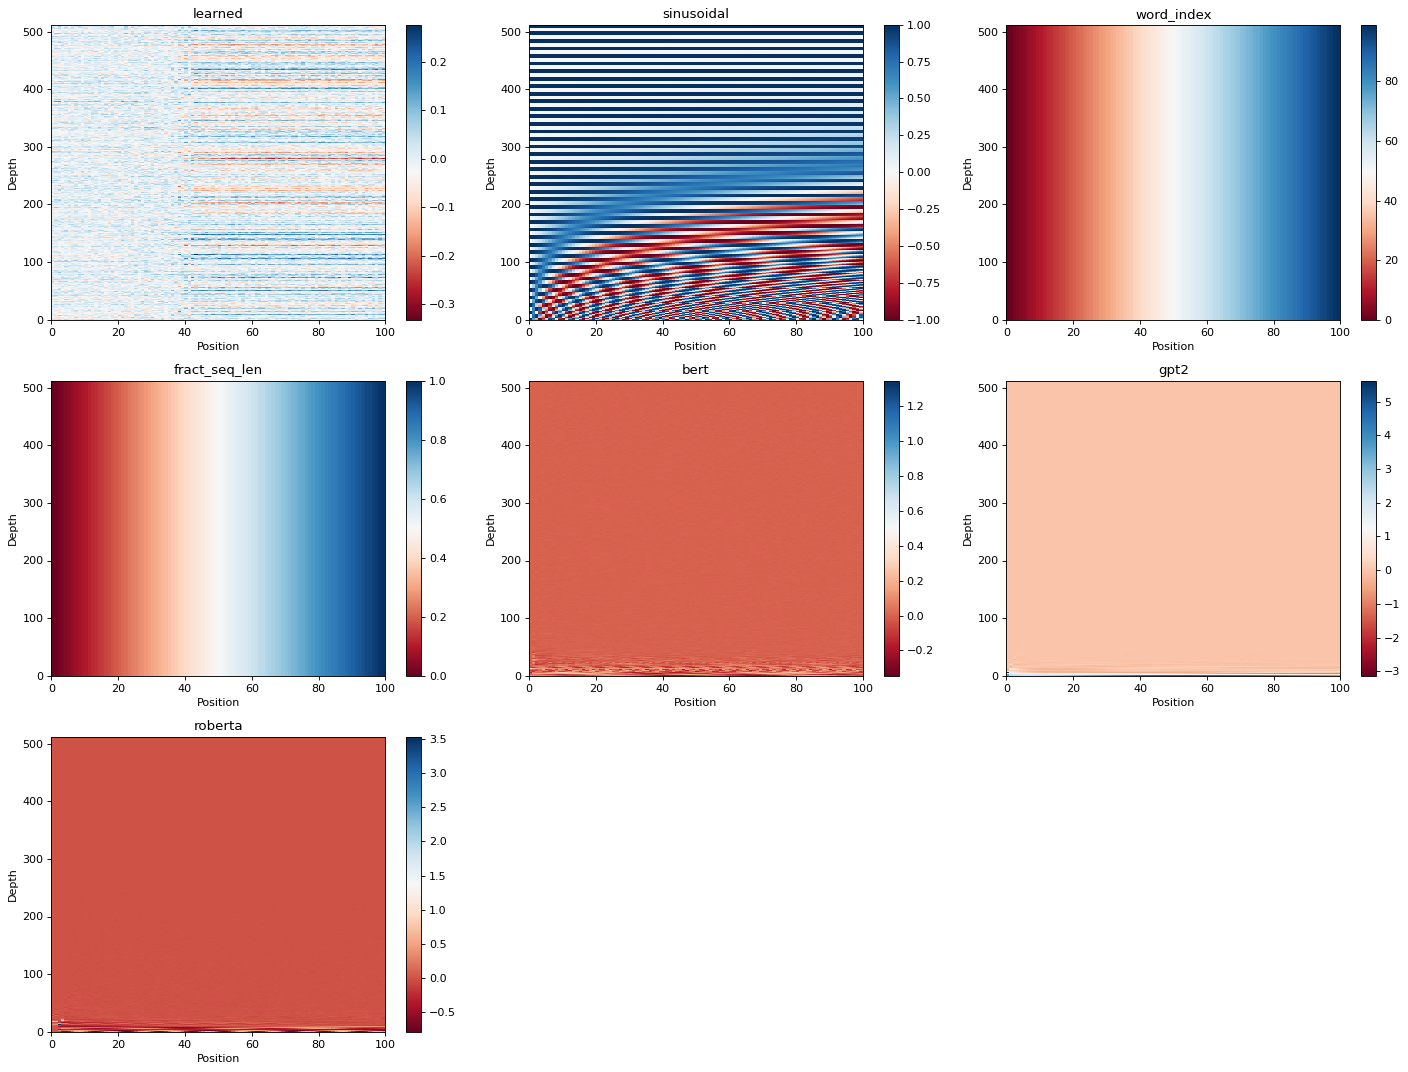

In [20]:
create_positional_embeddings_colormesh(positional_embeddings_dict, f'positional_embeddings_colormesh.png')

In [22]:
!pip install bertviz

     |████████████████████████████████| 156 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 42.1 MB/s 
     |████████████████████████████████| 131 kB 73.3 MB/s 
     |████████████████████████████████| 8.4 MB 55.2 MB/s 
     |████████████████████████████████| 79 kB 9.1 MB/s 
     |████████████████████████████████| 138 kB 77.5 MB/s 
     |████████████████████████████████| 127 kB 78.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [25]:
base_line = results_dict['baseline']['model']
base_line

In [39]:
base_line.layers[1]

In [40]:
def get_base_line(model):

  # att = model.transformer_encoder.att
  att = model.layers[2]
  emb = model.layers[1]

  return emb,att

emb,att = get_base_line(model)

In [26]:
learned_line = results_dict['learned']['model']
learned_line

In [27]:
sinusoidal_line = results_dict['sinusoidal']['model']
sinusoidal_line

In [28]:
word_index_line = results_dict['word_index']['model']
word_index_line

In [29]:
fract_seq_line = results_dict['fract_seq_len']['model']
fract_seq_line

In [30]:
bert_line = results_dict['bert']['model']
bert_line

In [31]:
gpt2_line = results_dict['gpt2']['model']
gpt2_line

In [32]:
roberta_line = results_dict['roberta']['model']
roberta_line

In [33]:
key_list = list(word_index.keys())

In [66]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import torch
from bertviz import head_view


'''
visualize attension layer for the given input text (self attention or attention between two sentences) using matplotlib
'''

class Attension_visulaizer():


  def __init__(self,embedding_layer,trained_attention_layer, pos_emb = None, sinusiodal_positional_encoding_layer = None,sin = False):
    self.sin = sin
    self.embedding_layer = embedding_layer
    self.trained_attention_layer = trained_attention_layer
    self.pos_emb = pos_emb
    self.sinusiodal_positional_encoding_layer = sinusiodal_positional_encoding_layer

  # #get model layer by index
  # def get_model_layer(self, idx):

  #   return self.model.get_layer(index=idx)
  #   #return self.model

  #turn text to number
  def vectorize(self,sentence):

    return text_vectorization(sentence)

  #tokenize the text and add sepcial tokens 
  def tokenizer(self,sentence):

    vectorized_text = text_vectorization(sentence)
    # print("vectorized_text",vectorized_text)
    actual_text = [key_list[ind] for ind in vectorized_text if key_list[ind]!=""]
    # print("actual_text",actual_text)
    return actual_text

  def get_emb_sinusiodal_out(self,token_embeddings,sinusiodal_positional_encoding_layer,input):

    token = token_embeddings(input)
    print("token",token.shape)

    mask = token_embeddings(input) == 0

    print("mask",mask.shape)
    print("sinusiodal_positional_encoding_layer",sinusiodal_positional_encoding_layer.shape)
    mask1 = tf.expand_dims(mask, 2)

    mask1 = tf.tile(mask1, tf.constant([1, 1, 512]))

    return tf.where(mask, token, token + sinusiodal_positional_encoding_layer)



 #get the output of a sentence from embedding layer 
  def embedding(self,sentence):

    # we just want to visualzie non-padding elements
    non_zero = len(self.tokenizer(sentence))

    #no positional embedding
    if(self.pos_emb == None and self.sin == False):
      embedded_text =  self.embedding_layer(self.vectorize(sentence)[:non_zero])
      token_embedded_text = None
      positional_embedded_text = None

      return tf.expand_dims(embedded_text, axis=0), None,None

    #learned positional embedding
    elif(self.sin == False): 
      try:
        embedded_text =  self.embedding_layer(self.vectorize(sentence)[:non_zero]) + self.pos_emb(self.vectorize(sentence)[:non_zero])

        token_embedded_text = self.embedding_layer(self.vectorize(sentence)[:non_zero])
        positional_embedded_text = self.embedding_layer(self.pos_emb(self.vectorize(sentence)[:non_zero]))
        print("&&&&&&&&&&&&&&&&&&",embedded_text.shape)

      #transformer_based positional embedding
      except:
        print( self.embedding_layer(self.vectorize(sentence)[:non_zero]).shape)
        embedded_text =  self.embedding_layer(self.vectorize(sentence)[:non_zero]) + self.pos_emb[:non_zero]

        token_embedded_text = self.embedding_layer(self.vectorize(sentence)[:non_zero])
        positional_embedded_text = self.pos_emb[:non_zero]

     #sinusoudal positional embedding
    elif(self.sin ==True):
      embedded_text = self.get_emb_sinusiodal_out(self.embedding_layer,sinusiodal_positional_encoding_layer[:,:non_zero],self.vectorize(sentence)[:non_zero] )
      embedded_text = tf.squeeze(embedded_text,0)
      print("&&&&&&&&&&&&&&&&&&",embedded_text.shape)

      token_embedded_text = self.embedding_layer(self.vectorize(sentence)[:non_zero])
      positional_embedded_text = sinusiodal_positional_encoding_layer[:,:non_zero]


    
    #mix_output,token_embedding, postional_embeddings
    return tf.expand_dims(embedded_text, axis=0), tf.expand_dims(token_embedded_text, axis=0),tf.expand_dims(positional_embedded_text, axis=0)

  def attention(self, sentence1, sentence2):

    # trained_attention_layer = self.get_model_layer(1)
    
    embedded_text1,token_embedded_text1,positional_embedded_text1  = self.embedding(sentence1)
    embedded_text2,token_embedded_text2,positional_embedded_text2  = self.embedding(sentence2)

    print("embedded_text1",embedded_text1.shape)
    print("embedded_text2",embedded_text2.shape)

    


    output_tensor, attn_weights = self.trained_attention_layer(embedded_text1, embedded_text2, return_attention_scores=True)

    if (token_embedded_text1 == None and positional_embedded_text1 == None):

       return output_tensor,attn_weights, None,None

    else:  

        print("token_embedded_text1",token_embedded_text1.shape)
        print("token_embedded_text2",token_embedded_text1.shape)
        print("positional_embedded_text1",positional_embedded_text1.shape)
        print("positional_embedded_text2",positional_embedded_text2.shape)
        token_output_tensor, token_attn_weights = self.trained_attention_layer(token_embedded_text1, token_embedded_text2, return_attention_scores=True)
        positional_output_tensor, positional_attn_weights = self.trained_attention_layer(positional_embedded_text2, positional_embedded_text2, return_attention_scores=True)
        return output_tensor,attn_weights,token_attn_weights,positional_attn_weights

  @staticmethod
  def attention_numpy(attn_weights ):

    return attn_weights.numpy()


  @staticmethod
  def attention_torch(attn_weights ):

    return torch.tensor(Attension_visulaizer.attention_numpy(attn_weights ))


  
  def evaluateAndShowAttention(self,sentence1, sentence2 =None, attension_heads = None):

    if sentence2 == None:
      sentence2 = sentence1

    #computing the attention weights between two sentences *** we discart the attension weights if sentence length is less than max_len***
    print("sentence1",len(sentence1))  
    output_tensor,attn_weights,token_attn_weights,positional_attn_weights = self.attention(sentence1,sentence2)
    print("output_tensor",output_tensor.shape)  

    tkn_sen1 = self.tokenizer(sentence1)
    tkn_sen2 = self.tokenizer(sentence2)

    #attention weights for visualization should be in numpy
    attentions_numpy = Attension_visulaizer.attention_numpy(attn_weights)
    # just squeez the first dimension to plot it using showAttention function
    attentions_numpy1 = attentions_numpy.transpose((0, 2,3,1))[0,:,:,:]

    print("attn_weights",attn_weights.shape)

   
    

    print("Mix_head")
    self.showAttention(tkn_sen1, tkn_sen2, attentions_numpy1,attension_heads)

    self.attention_head(attentions_numpy,tkn_sen1)

    self.head_view(attentions_numpy,tkn_sen1)

    if (token_attn_weights != None):

        #attention weights for visualization should be in numpy
        token_attentions_numpy = Attension_visulaizer.attention_numpy(token_attn_weights)
        # just squeez the first dimension to plot it using showAttention function
        token_attentions_numpy1 = token_attentions_numpy.transpose((0, 2,3,1))[0,:,:,:]

      
        print("Token_head")
        self.showAttention(tkn_sen1, tkn_sen2, token_attentions_numpy1,attension_heads)

        self.attention_head(token_attentions_numpy,tkn_sen1)

        self.head_view(token_attentions_numpy,tkn_sen1)


    if (positional_attn_weights != None):


        print("Positional_head")

        #attention weights for visualization should be in numpy
        positional_attentions_numpy = Attension_visulaizer.attention_numpy(positional_attn_weights)
        # just squeez the first dimension to plot it using showAttention function
        positional_attentions_numpy1 = positional_attentions_numpy.transpose((0, 2,3,1))[0,:,:,:]
        self.showAttention(tkn_sen1, tkn_sen2, positional_attentions_numpy1,attension_heads)

        self.attention_head(positional_attentions_numpy,tkn_sen1)

        self.head_view(positional_attentions_numpy,tkn_sen1)


    # return  output_tensor,attn_weights

  def showAttention(self,input_sentence, output_words, attentions,attension_heads = None):

    if attension_heads != None:

      w = attentions[:,:,attension_heads]
      plt_range = 1


    else:

       w = attentions
       plt_range = w.shape[2]
    
    print(w[1].shape)
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (2*len(input_sentence), 2*len(output_words)), facecolor = "w")

    for i in range(plt_range):
      print(i)
      axes[i].imshow(w[:,:,i])
      axes[i].set_yticks(np.arange(len(input_sentence)))
      axes[i].set_yticklabels(input_sentence)
      axes[i].set_xticks(np.arange(len(input_sentence)))
      axes[i].set_xticklabels(input_sentence)
      plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
      
    plt.show()

  from bertviz import head_view
 
  def attention_head(self,attention_w,actual_text):
    attension_heads = []
    attention = torch.tensor(attention_w)

    for i in range(attention.shape[1]):

      attension_heads.append(attention[:,i:i+1,:,:])

    # attension_heads = (attention[:,0:1,:,:],attention[:,1:2,:,:],attention[:,2:3,:,:],attention[:,3:4,:,:])
    attension_heads = tuple(attension_heads)

    # print("8888888888",attension_heads)

    # different_heads but this function is for different layer

    head_view(attension_heads, actual_text)

  
  def head_view(self,attention_w,actual_text):

    attention = torch.tensor(attention_w)

    head_view((attention,), actual_text)


In [71]:
import random

def randomized_text(x_train):
  # Random Example Text
  rnd = random.randint(0,x_train.shape[0])
  vectorized_text = x_train[rnd]
  print("vectorized_text",vectorized_text)

  # key_list = list(word_index.keys())
  actual_text = [key_list[ind] for ind in vectorized_text]
  text = " ".join(actual_text)
  print(text)

  return text, y_train[rnd]

text, label = randomized_text(x_train)

print("label",label)

vectorized_text tf.Tensor(
[12661  2087     6   271   117     5   409     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0], shape=(100,), dtype=int64)
interminably bleak to say nothing of boring                                                                                             
label 0.0


Models Attention Heat Map

In [72]:
def get_base_line(model):

  # att = model.transformer_encoder.att
  att = model.layers[2]
  emb = model.layers[1]

  return emb,att

emb,att = get_base_line(base_line)

sentence1 136
embedded_text1 (1, 7, 512)
embedded_text2 (1, 7, 512)
output_tensor (1, 7, 512)
attn_weights (1, 1, 7, 7)
Mix_head
(7, 1)
0


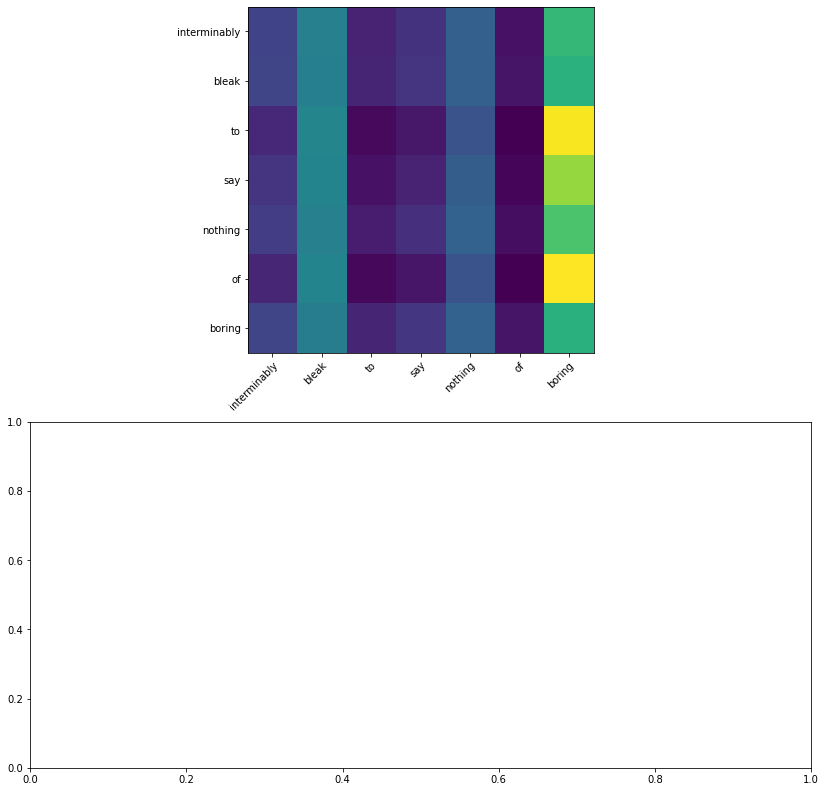

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
import matplotlib.pyplot as plt
#https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html


# attn_no_positional = attn_model_no_positional.get_model_layer(1)

# emb,pos_emb,att
vis = Attension_visulaizer(emb, att,pos_emb = None)
actual_text = text
vis.evaluateAndShowAttention(actual_text, attension_heads = None)

In [ ]:
def get_learned_positional(model):

  # att = model.transformer_encoder.att
  att = model.layers[4]
  emb = model.layers[2]
  pos_emb = model.layers[1]

  return emb,pos_emb,att

emb,pos_emb,att = get_learned_positional(model)

sentence1 153
&&&&&&&&&&&&&&&&&& (11, 512)
&&&&&&&&&&&&&&&&&& (11, 512)
embedded_text1 (1, 11, 512)
embedded_text2 (1, 11, 512)
output_tensor (1, 11, 512)
attn_weights (1, 1, 11, 11)
(11, 1)
0


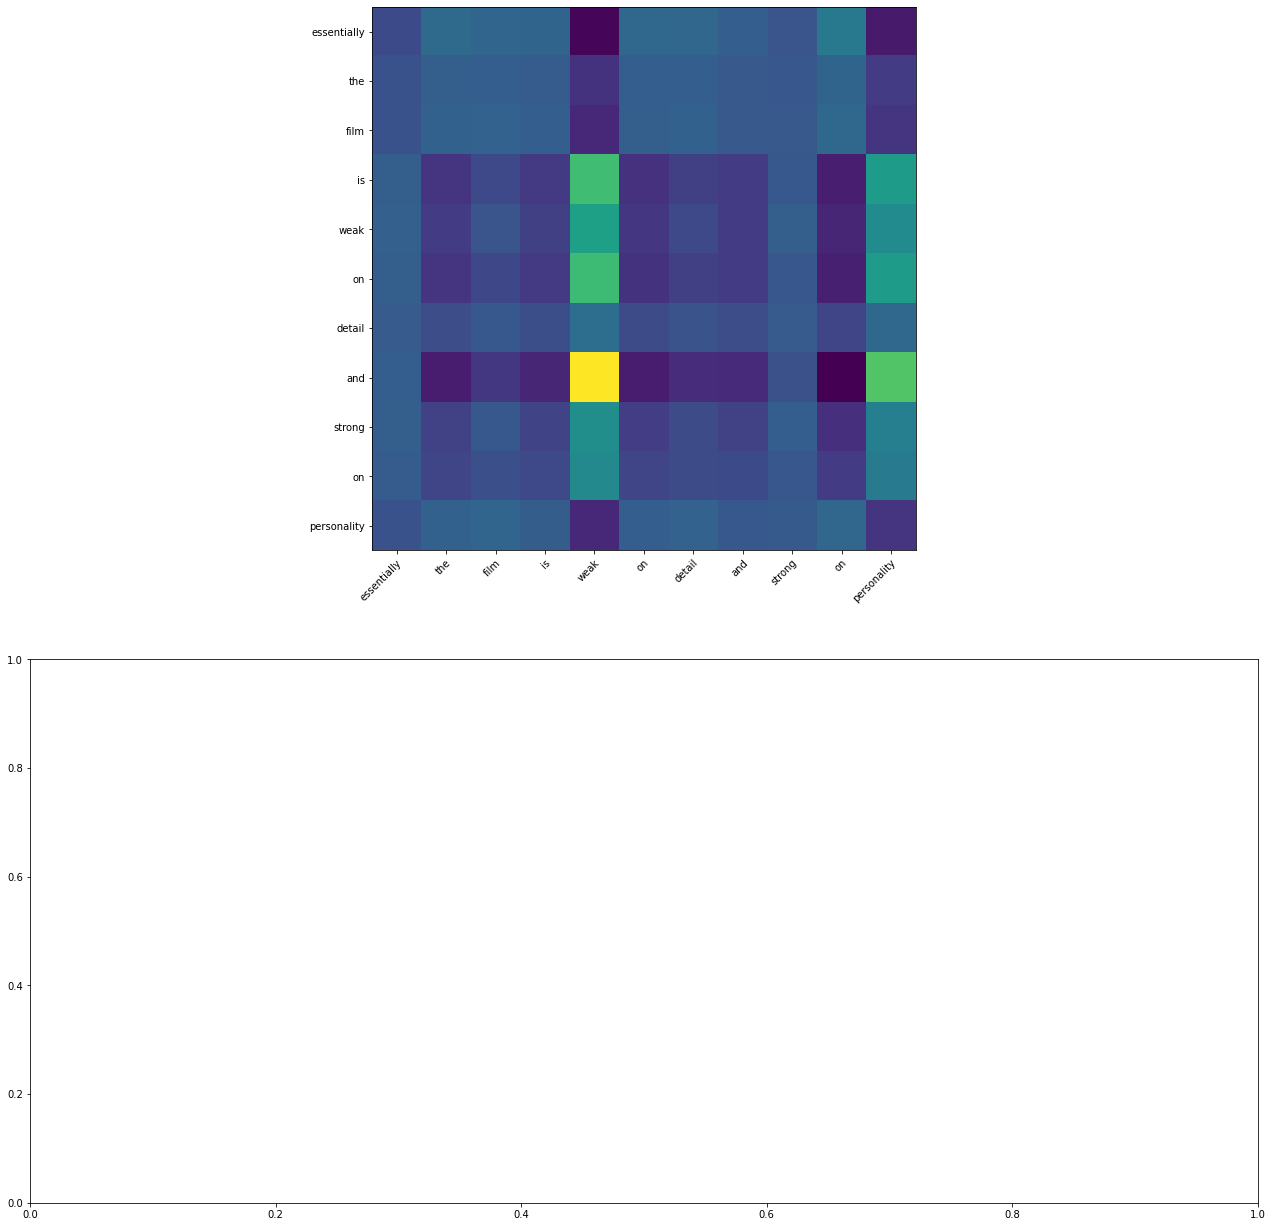

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
#https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html


# attn_no_positional = attn_model_no_positional.get_model_layer(1)

# emb,pos_emb,att
vis = Attension_visulaizer(emb, att,pos_emb = pos_emb)
actual_text = text
vis.evaluateAndShowAttention(actual_text, attension_heads = None)

In [ ]:
def get_sinusiodal_emb(model):

  # token_embeddings = attn_model_sinusoidal_positional.embedding
  token_embeddings = model.layers[2]
  # att = model.transformer_encoder.att
  att =  model.layers[3]

  return token_embeddings,att

token_embeddings,att = get_sinusiodal_emb(model1[1])

sentence1 153
&&&&&&&&&&&&&&&&&& (11, 512)
&&&&&&&&&&&&&&&&&& (11, 512)
embedded_text1 (1, 11, 512)
embedded_text2 (1, 11, 512)
output_tensor (1, 11, 512)
attn_weights (1, 1, 11, 11)
(11, 1)
0


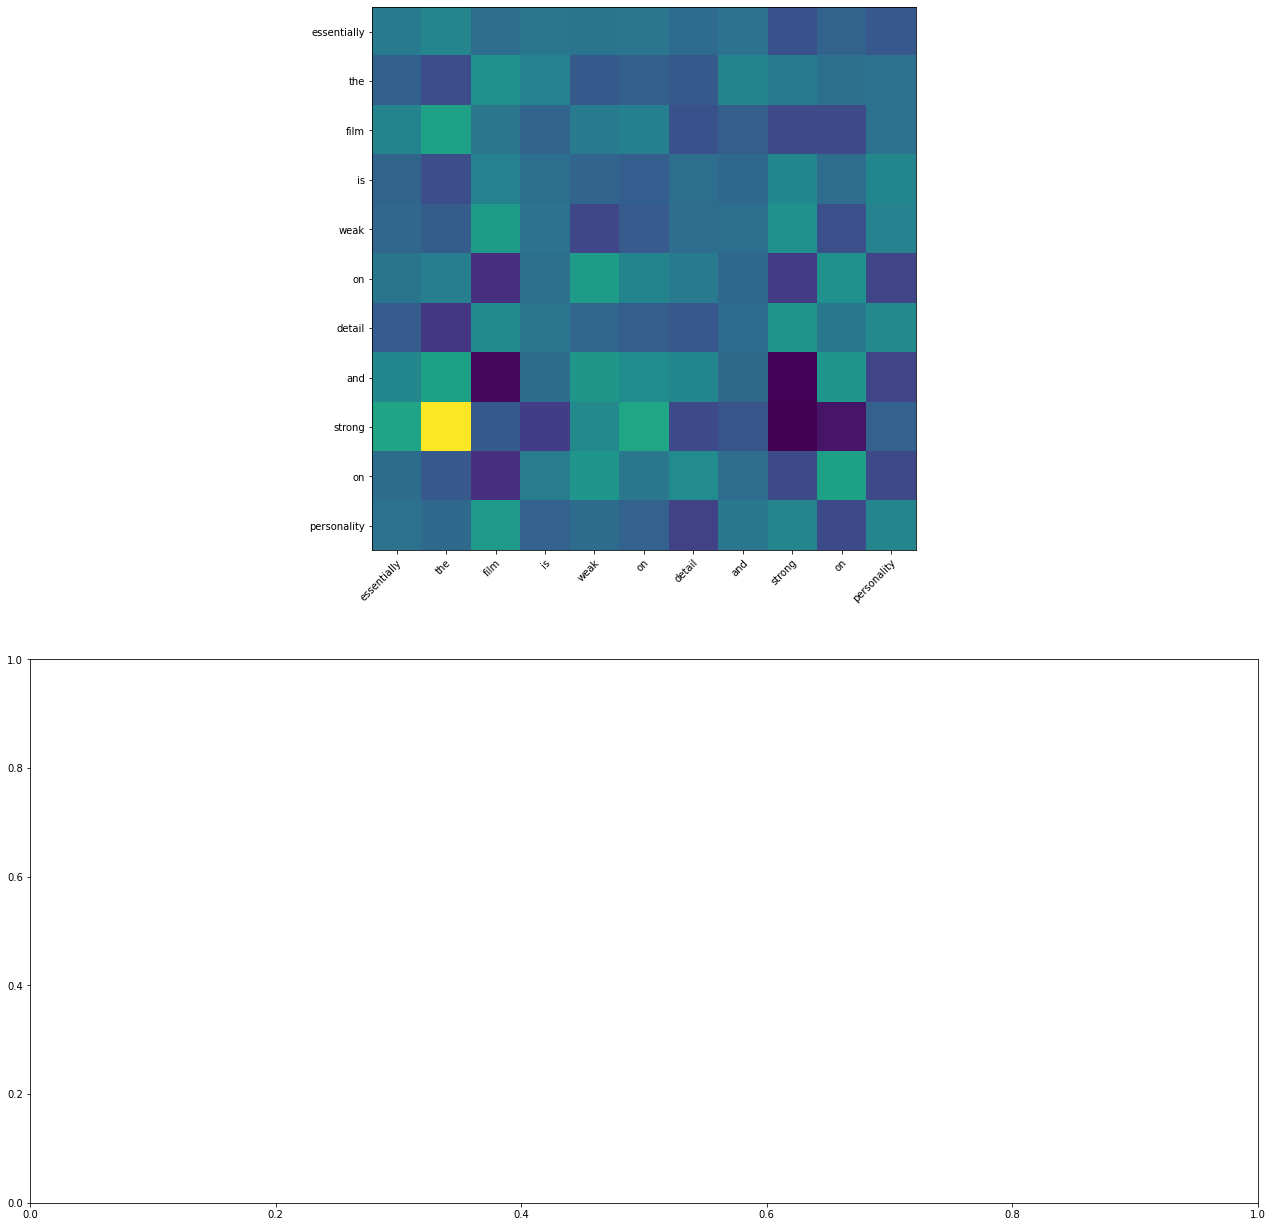

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
#https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html


# attn_no_positional = attn_model_no_positional.get_model_layer(1)

# emb,pos_emb,att
vis = Attension_visulaizer(emb, att,pos_emb = pos_emb)
actual_text = text
vis.evaluateAndShowAttention(actual_text, attension_heads = None)

In [ ]:
def get_bert(model,use_pca, use_minmax_scale):

  # att = model.transformer_encoder.att
  print(model)
  att = model.layers[3]
  emb = model.layers[1]
  pos_emb = get_positional_embeddings('bert',use_pca,use_minmax_scale)

  return emb,pos_emb,att

emb,pos_emb,att = get_bert(model2[1],True,False)

sentence1 153
(11, 512)
(11, 512)
embedded_text1 (1, 11, 512)
embedded_text2 (1, 11, 512)
output_tensor (1, 11, 512)
attn_weights (1, 1, 11, 11)
(11, 1)
0


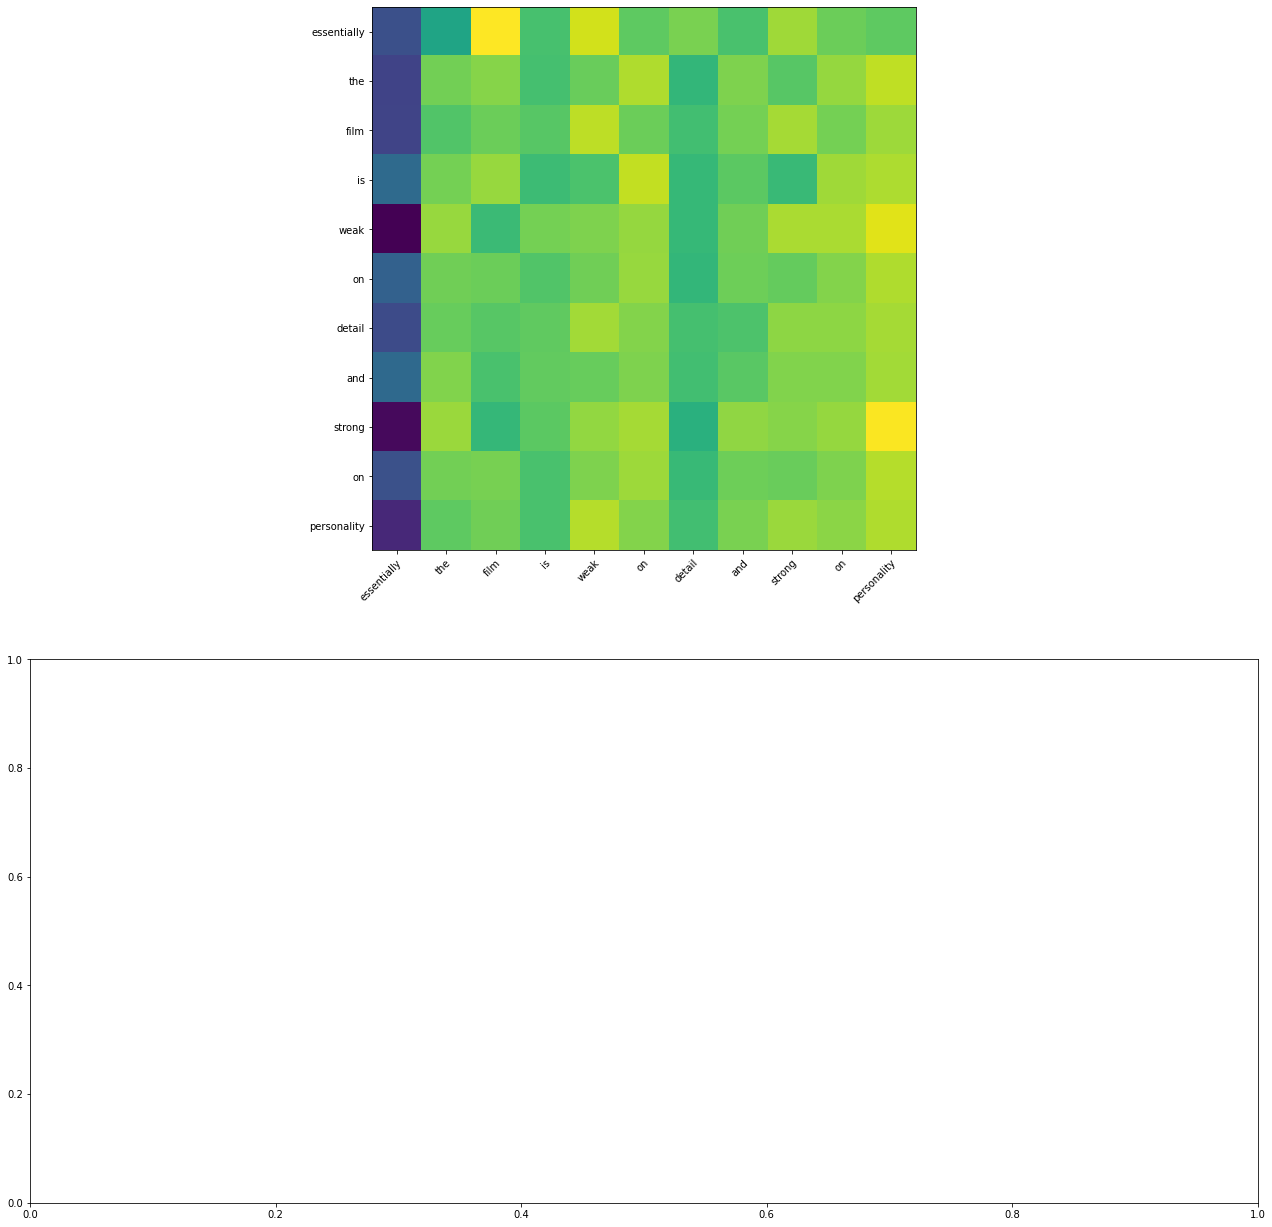

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
#https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html


# attn_no_positional = attn_model_no_positional.get_model_layer(1)

vis = Attension_visulaizer(emb, att,pos_emb = pos_emb)
actual_text = text
vis.evaluateAndShowAttention(actual_text, attension_heads = None)

In [ ]:
def get_gpt2(model,use_pca, use_minmax_scale):

  # att = model.transformer_encoder.att
  att = model.layers[3]
  emb = model.layers[1]
  pos_emb = get_positional_embeddings('gpt2',use_pca, use_minmax_scale)

  return emb,pos_emb,att

emb,pos_emb,att = get_gpt2(model3[1],True,False)

sentence1 153
(11, 512)
(11, 512)
embedded_text1 (1, 11, 512)
embedded_text2 (1, 11, 512)
output_tensor (1, 11, 512)
attn_weights (1, 1, 11, 11)
(11, 1)
0


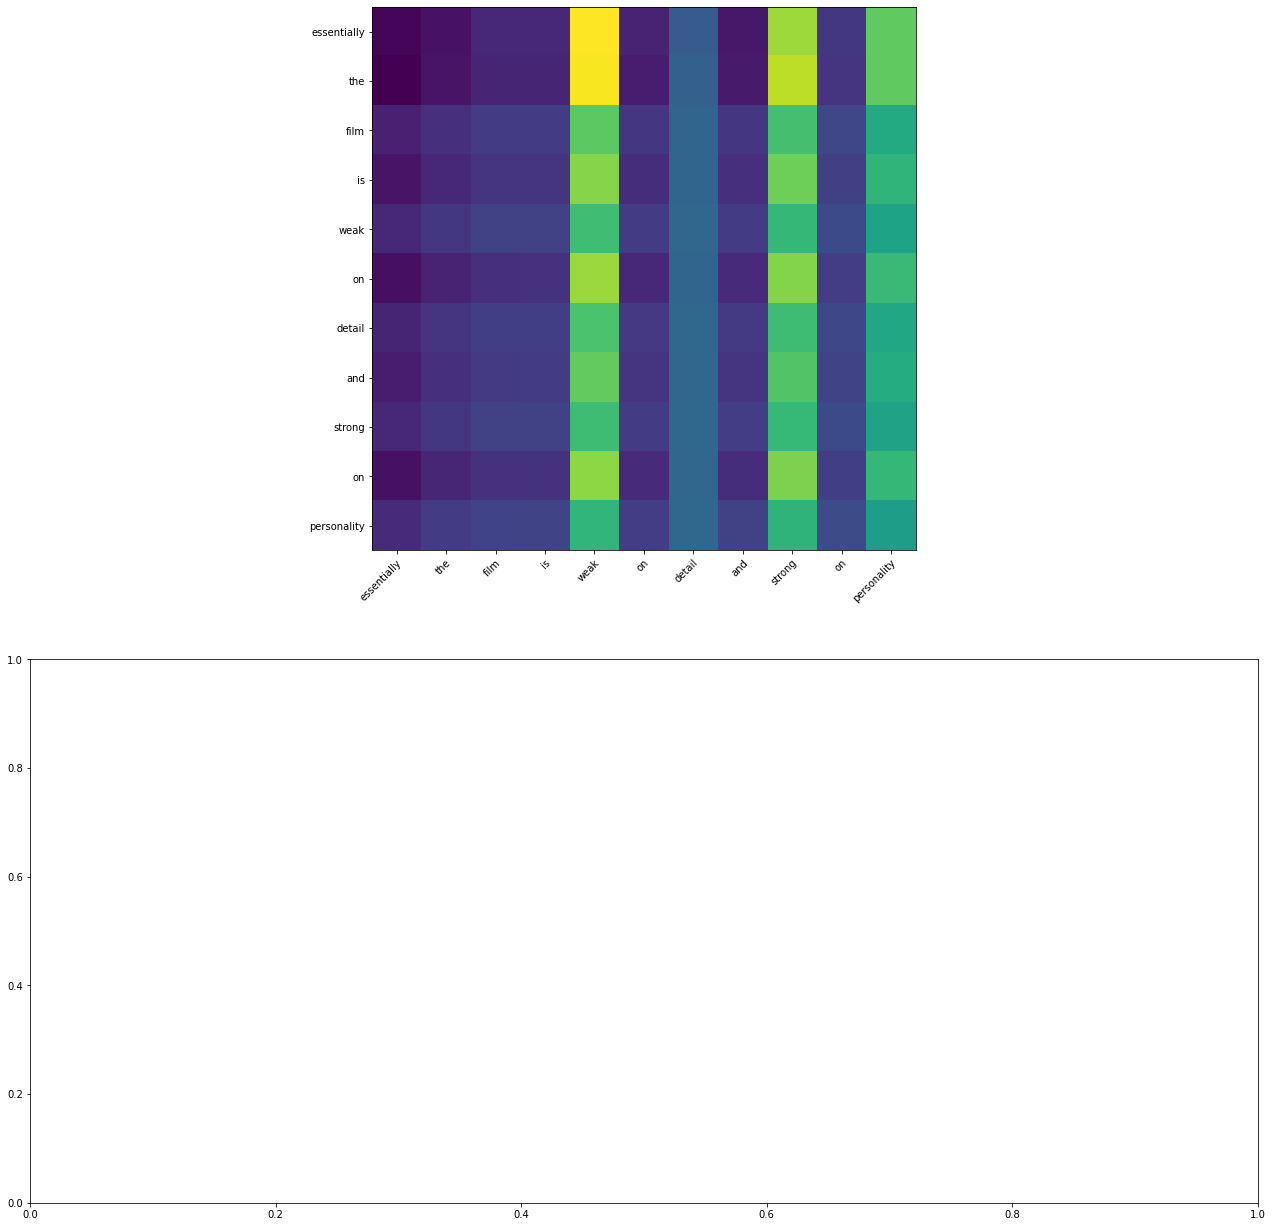

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
#https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html


# attn_no_positional = attn_model_no_positional.get_model_layer(1)

# emb,pos_emb,att
vis = Attension_visulaizer(emb, att,pos_emb = pos_emb)
actual_text = text
vis.evaluateAndShowAttention(actual_text, attension_heads = None)

In [ ]:
def get_roberta(model,use_pca, use_minmax_scale):

  # att = model.transformer_encoder.att
  att = model.layers[3]
  emb = model.layers[1]
  pos_emb = get_positional_embeddings('roberta',use_pca,use_minmax_scale)

  return emb,pos_emb,att

emb,pos_emb,att = get_gpt2(model4[1],True,False)

sentence1 153
(11, 512)
(11, 512)
embedded_text1 (1, 11, 512)
embedded_text2 (1, 11, 512)
output_tensor (1, 11, 512)
attn_weights (1, 1, 11, 11)
(11, 1)
0


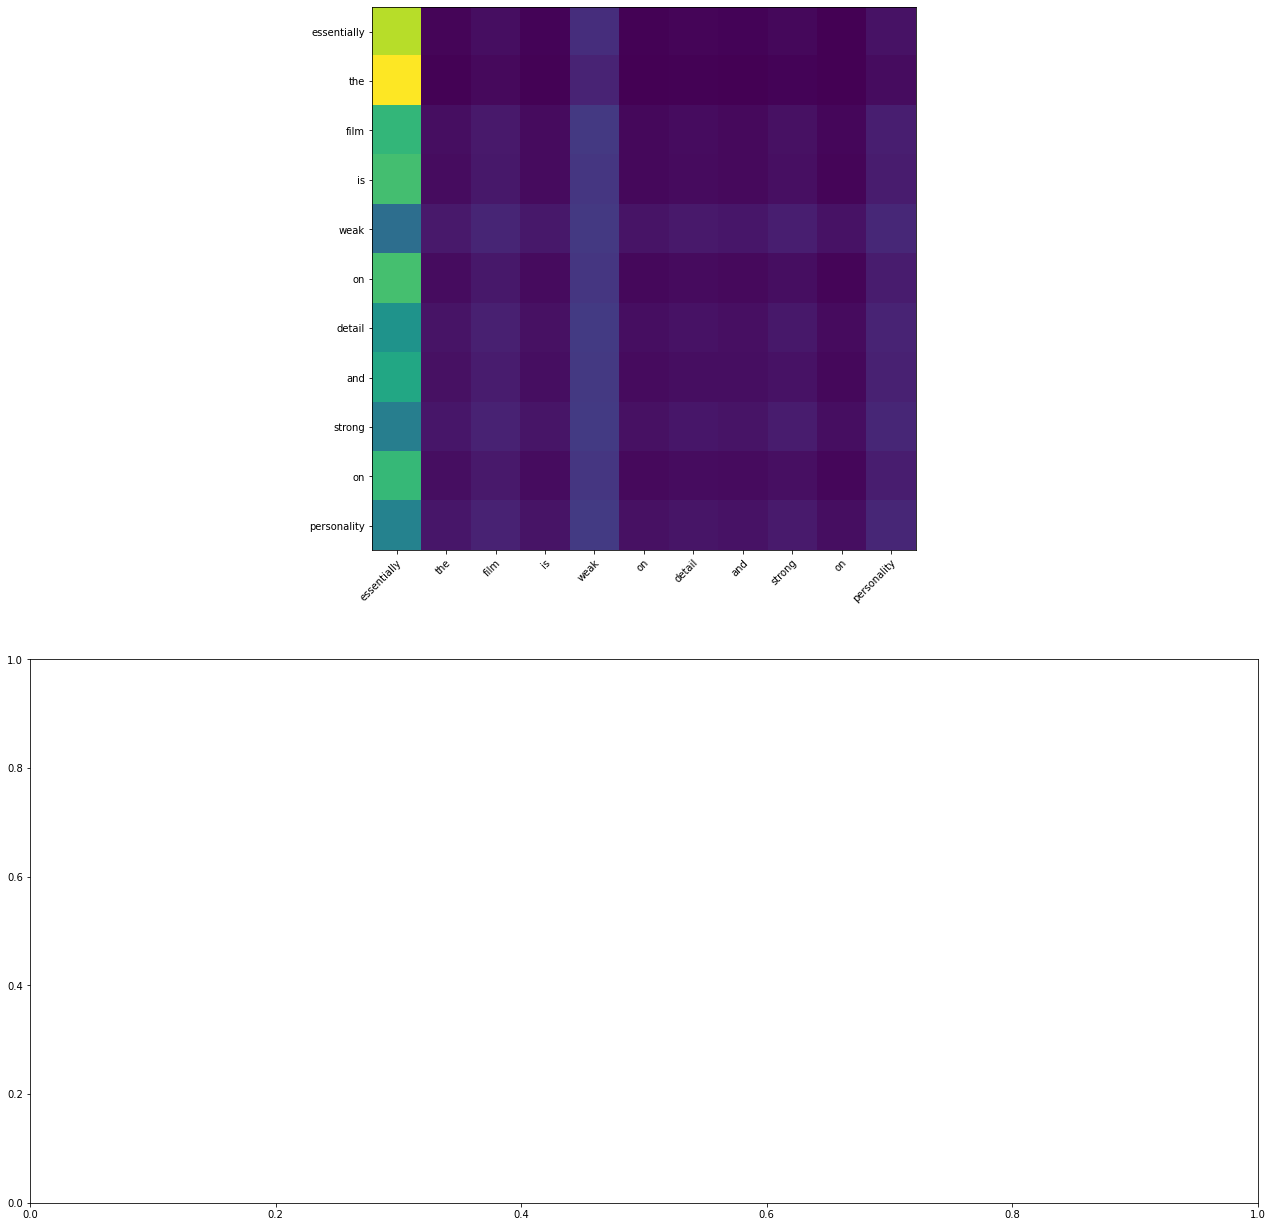

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
#https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html


# attn_no_positional = attn_model_no_positional.get_model_layer(1)

# emb,pos_emb,att
vis = Attension_visulaizer(emb, att,pos_emb = pos_emb)
actual_text = text
vis.evaluateAndShowAttention(actual_text, attension_heads = None)